# Make my a Playlist: Fun with Spotify and Echonest APIs

https://developer.spotify.com/documentation/web-api/reference/

## Get set-up

In [1]:
import pip_magic
from playlist_maker import PlaylistMaker
from IPython.display import Image, display, HTML
import math
import toolz
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Note: pip_magic does not work with pip v10. I used pip v9.0.3
%pip install spotipy

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Helper Functions

In [3]:
playlist = PlaylistMaker()

In [4]:
def image_grid(images, rows=1, height=200, width=200):
    images_as_html = '<table>'
    images_per_row = math.ceil(len(images) / rows)
    for r in range(rows):
        images_this_row = images[r*images_per_row : r*images_per_row+images_per_row]
        if images_this_row:
            images_as_html += '<tr>'
            for img in images_this_row:
                images_as_html += f"<td><img src='{img}' height='{height}' width='{width}''></td>"
            images_as_html += '</tr>'
    images_as_html += '</table>'
    display(HTML(images_as_html))

## Get some spotify details on a list of artists...

In [5]:
artists = ['David Ramirez', 'Jeffrey Foucault', 'John Fullbright', 'Joe Purdy']
artist_deets = playlist.artist_details(artists).set_index('Artist Name')

### Who has the most Spotify followers?

In [6]:
most_followers = artist_deets.sort_values('Artist Followers',ascending=False)['Artist Followers'][:1].to_dict()
artist_, followers_ = list(most_followers.items())[0]
print(f'Out of {", ".join(artists)}...')
print(f'{artist_} has the most followers with {followers_:,}.')

Out of David Ramirez, Jeffrey Foucault, John Fullbright, Joe Purdy...
Joe Purdy has the most followers with 64,342.


### Give me some related artists...

In [7]:
related_artists = (playlist.find_related_artists(playlist.artist_details(artists), 3)
                   .set_index('Artist Name')
                   .sort_values('Artist Followers', ascending=False))
print('Here are the top 3 related artists for each of your artists:')
display(related_artists[['Artist Followers', 'Artist Popularity']])
imgs = [related_artists.at[a, 'Artist Image'] for a in related_artists.index]
image_grid(imgs,3,300,300);

Here are the top 3 related artists for each of your artists:


,Artist Followers,Artist Popularity
Artist Name,,
Brett Dennen,118189,58
Noah Gundersen,82036,54
Matt Costa,50205,47
Horse Feathers,48791,50
Todd Snider,31468,44
Chris Knight,29849,43
Tift Merritt,18211,44
Greg Brown,13311,41
Amanda Shires,12305,44


,,,
,,,
,,,


### What are the common genres?

In [8]:
genres = list(related_artists['Artist Genres'])
genres = sum(genres, []) # slick way to flatten list
genres_occurance = toolz.frequencies(genres)
print(f'Out of the {len(related_artists)} related artists, here are the most common genres:')
for g, v in pd.Series(genres_occurance).sort_values(ascending=False)[:15].iteritems():
    print(f'   {g} ({v})')

Out of the 12 related artists, here are the most common genres:
   roots rock (6)
   new americana (6)
   alternative country (5)
   folk (5)
   traditional folk (4)
   folk-pop (4)
   stomp and holler (4)
   outlaw country (4)
   country rock (3)
   indie folk (3)
   lilith (3)
   texas country (2)
   neo mellow (2)
   ectofolk (2)
   deep new americana (2)


## Let's look at the tracks for a single artist...
### The Beatles

In [9]:
artist = 'The Beatles'
artist_tracks = playlist.get_artist_tracks(artist)
artist_tracks = playlist.add_audio_features(artist_tracks)
print(f'{len(artist_tracks)} tracks from {artist}.')
artist_tracks['Release Date'] = pd.to_datetime(artist_tracks['Release Date'])
artist_tracks = (artist_tracks.set_index(['Album Name','Track Name'])
                 .sort_values('Track Popularity',ascending=False))
artist_tracks[:5].drop(['Album ID', 'Artist', 'Track ID'],axis=1)

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
268 tracks from The Beatles.


Release Date  \
Album Name                    Track Name                                     
Abbey Road (Remastered)       Here Comes The Sun - Remastered   1969-09-26   
                              Come Together - Remastered        1969-09-26   
1 (Remastered)                Hey Jude - Remastered 2015        2000-11-13   
Let It Be (Remastered)        Let It Be - Remastered            1970-05-08   
Please Please Me (Remastered) Twist And Shout - Remastered      1963-03-22   

                                                               Track Popularity  \
Album Name                    Track Name                                          
Abbey Road (Remastered)       Here Comes The Sun - Remastered                75   
                              Come Together - Remastered                     71   
1 (Remastered)                Hey Jude - Remastered 2015                     69   
Let It Be (Remastered)        Let It Be - Remastered                         69   
Please Please Me (Remastered) Twist And Shout - Remastered                   68   

                                                               Acousticness  \
Album Name                    Track Name                                      
Abbey Road (Remastered)       Here Comes The Sun - Remastered        0.0339   
                              Come Together - Remastered             0.0302   
1 (Remastered)                Hey Jude - Remastered 2015             0.0112   
Let It Be (Remastered)        Let It Be - Remastered                 0.6310   
Please Please Me (Remastered) Twist And Shout - Remastered           0.6410   

                                                               Danceability  \
Album Name                    Track Name                                      
Abbey Road (Remastered)       Here Comes The Sun - Remastered         0.557   
                              Come Together - Remastered              0.533   
1 (Remastered)                Hey Jude - Remastered 2015              0.386   
Let It Be (Remastered)        Let It Be - Remastered                  0.443   
Please Please Me (Remastered) Twist And Shout - Remastered            0.482   

                                                               Duration  \
Album Name                    Track Name                                  
Abbey Road (Remastered)       Here Comes The Sun - Remastered  3.095550   
                              Come Together - Remastered       4.332450   
1 (Remastered)                Hey Jude - Remastered 2015       7.094217   
Let It Be (Remastered)        Let It Be - Remastered           4.050450   
Please Please Me (Remastered) Twist And Shout - Remastered     2.587117   

                                                               Energy  \
Album Name                    Track Name                                
Abbey Road (Remastered)       Here Comes The Sun - Remastered   0.540   
                              Come Together - Remastered        0.376   
1 (Remastered)                Hey Jude - Remastered 2015        0.607   
Let It Be (Remastered)        Let It Be - Remastered            0.403   
Please Please Me (Remastered) Twist And Shout - Remastered      0.849   

                                                               Instrumentalness  \
Album Name                    Track Name                                          
Abbey Road (Remastered)       Here Comes The Sun - Remastered          0.002480   
                              Come Together - Remastered               0.248000   
1 (Remastered)                Hey Jude - Remastered 2015               0.000014   
Let It Be (Remastered)        Let It Be - Remastered                   0.000000   
Please Please Me (Remastered) Twist And Shout - Remastered             0.000008   

                                                               Key  Liveness  \
Album Name                    Track Name                                       
Abbey Road (Remastered)       Here Comes The 

#### The Beatles Catalog Plotted

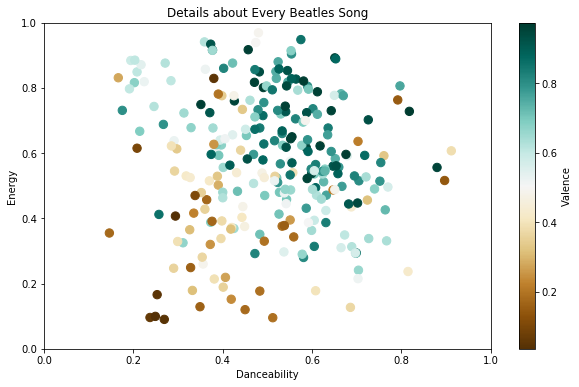

In [10]:
x_var, y_var, c_var = ('Danceability', 'Energy', 'Valence')
f, ax = plt.subplots(figsize=(10,6))
x=artist_tracks[x_var]
y=artist_tracks[y_var]
c=artist_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_title('Details about Every Beatles Song')
points = ax.scatter(x, y, c=c, s=70, cmap='BrBG')
f.colorbar(points, label=c_var);

#### The Beatles Catalog Grouped by Albums

In [11]:
artist_tracks_grouped = artist_tracks.groupby('Album Name').mean()

In [12]:
print('Average Scores for all Beatles Albums')
artist_tracks_grouped.sort_values('Danceability', ascending=False)

Average Scores for all Beatles Albums


,Track Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
Album Name,,,,,,,,,,,,,
A Hard Day's Night (Remastered),49.846154,0.377900,0.601462,2.322683,0.609538,2.984615e-07,4.307692,0.216431,-7.338308,0.615385,0.036538,3.923077,0.761462
Beatles For Sale (Remastered),43.785714,0.525000,0.592286,2.413304,0.596429,5.159186e-02,5.357143,0.202193,-8.459000,1.000000,0.038107,4.000000,0.812000
Rubber Soul (Remastered),53.428571,0.150806,0.587786,2.538490,0.539357,9.021500e-05,4.285714,0.102893,-10.389500,0.785714,0.043543,3.928571,0.716357
Please Please Me (Remastered),50.428571,0.575500,0.547929,2.322999,0.599786,9.599714e-05,3.214286,0.183379,-10.256929,0.857143,0.038979,3.928571,0.787143
Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition),37.806452,0.341524,0.536516,3.230688,0.548677,8.943288e-02,3.645161,0.254568,-8.815839,0.838710,0.081165,3.806452,0.481226
Help! (Remastered),50.642857,0.295386,0.528000,2.422652,0.610929,3.178571e-04,6.428571,0.156086,-8.258571,0.928571,0.038400,3.785714,0.726714
1 (Remastered),55.518519,0.276102,0.526815,2.933226,0.662333,1.930301e-02,4.037037,0.205644,-6.911593,0.814815,0.037404,4.000000,0.681741
Let It Be (Remastered),51.666667,0.364050,0.520417,2.931075,0.545917,5.590117e-03,4.000000,0.303842,-9.830833,0.750000,0.066733,3.833333,0.614667
Abbey Road (Remastered),55.000000,0.224964,0.518000,2.793830,0.457176,1.228023e-01,3.588235,0.177718,-11.344412,0.705882,0.047312,3.647059,0.459176


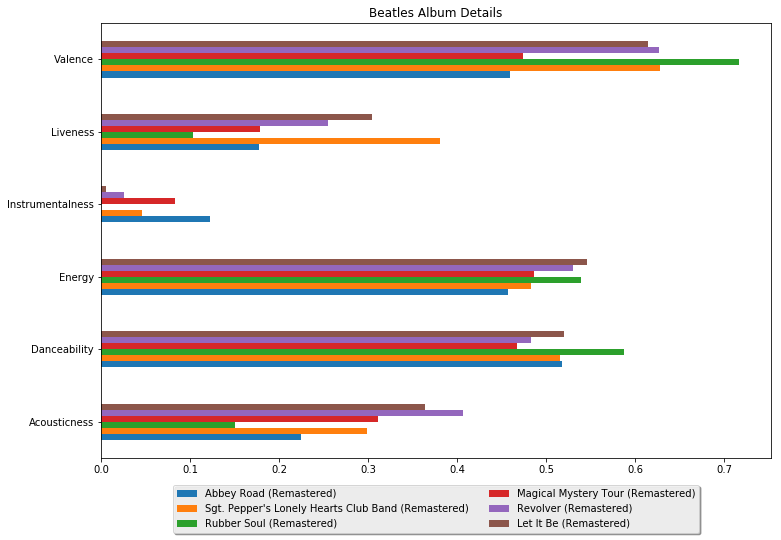

In [13]:
ax = artist_tracks_grouped.sort_values('Track Popularity', ascending=False)[1:7][['Acousticness', 'Danceability','Energy', 'Instrumentalness', 
                       'Liveness', 'Valence']].T.plot(kind='barh', figsize=(12,8))
ax.set_title('Beatles Album Details')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2);

## Tom Waits

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
338 tracks from Tom Waits.


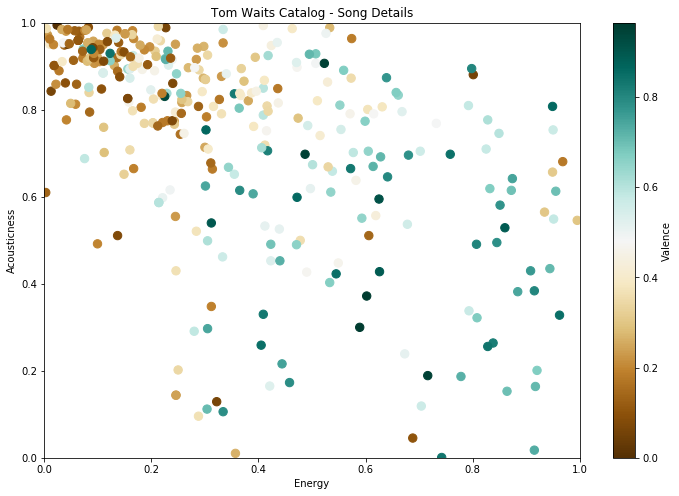

In [14]:
artist = 'Tom Waits'
tracks = playlist.get_artist_tracks(artist)
tracks = playlist.add_audio_features(tracks)
x_var, y_var, c_var = ('Energy', 'Acousticness', 'Valence')
f, ax = plt.subplots(figsize=(12,8))
x=tracks[x_var]
y=tracks[y_var]
c=tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_title(f'{artist} Catalog - Song Details')
points = ax.scatter(x, y, c=c, s=70, cmap='BrBG')
f.colorbar(points, label=c_var)
print(f'{len(tracks)} tracks from {artist}.')

## A Look at Data From an Existing Playlist

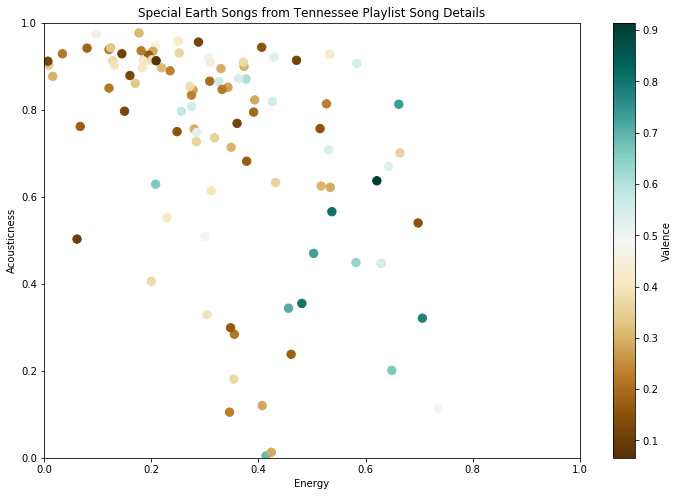

In [15]:
tracks = playlist.track_details_from_playlist('Special Earth Songs from Tennessee')
plylst_tracks = playlist.add_audio_features(tracks)
x_var, y_var, c_var = ('Energy', 'Acousticness', 'Valence')
f, ax = plt.subplots(figsize=(12,8))
x=plylst_tracks[x_var]
y=plylst_tracks[y_var]
c=plylst_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_title('Special Earth Songs from Tennessee Playlist Song Details')
points = ax.scatter(x, y, c=c, s=70, cmap='BrBG')
f.colorbar(points, label=c_var);

## Time to Create a Playlist...

In [16]:
artists = ['David Ramirez', 'Jason Isbell', 'John Fullbright', 'Ryan Adams']
tracks = playlist.create_track_list_of_related_artists(artists, include_seed_artists=True,
                                                       num_top_tracks_per_artist=5,
                                                       num_related_artists=8)
plylst_tracks = playlist.add_audio_features(tracks).sort_values('Track Popularity',ascending=False)
print(f'Based on the {len(artists)} seed artists, a playlist of {len(plylst_tracks)} songs was created.')

Based on the 4 seed artists, a playlist of 150 songs was created.


In [17]:
related_artists = (plylst_tracks[['Artist Followers', 'Artist Image', 'Artist Name', 'Artist Popularity']]
                   .drop_duplicates().set_index('Artist Name').dropna()
                   .sort_values('Artist Followers',ascending=False))
print('Artists:',', '.join(list(related_artists.index)))
imgs = [related_artists.at[a, 'Artist Image'] for a in related_artists.index]
image_grid(imgs,5,300,300);

Artists: Wilco, Dawes, Josh Garrels, Noah Gundersen, Langhorne Slim, Justin Townes Earle, Joe Purdy, Drew Holcomb & The Neighbors, The Jayhawks, Nathaniel Rateliff, Hayes Carll, Whiskeytown, Old 97's, Uncle Tupelo, Ryan Adams & The Cardinals, Hiss Golden Messenger, Joe Pug, Dave Rawlings Machine, American Aquarium, Robert Ellis, Slaid Cleaves, Jeffrey Foucault, The Damn Quails, The Bottle Rockets, Patterson Hood, Adam Carroll, BJ Barham


### Write it to Spotify

In [18]:
playlist.create_playlist_of_tracks(plylst_tracks,'Jupy Sunday')

## And Again

In [29]:
artists = ['LCD Soundsystem', 'Talking Heads', 'Muse', 'Arcade Fire', 'Radiohead']
tracks = playlist.create_track_list_of_related_artists(artists, include_seed_artists=True,
                                                       num_top_tracks_per_artist=5,
                                                       num_related_artists=5)
plylst_tracks = playlist.add_audio_features(tracks).sort_values('Track Popularity',ascending=False)
print(f'Based on the {len(artists)} seed artists, a playlist of {len(plylst_tracks)} songs was created.')

TypeError: 'NoneType' object is not subscriptable

In [20]:
related_artists = (plylst_tracks[['Artist Followers', 'Artist Image', 'Artist Name', 'Artist Popularity']]
                   .drop_duplicates().set_index('Artist Name').dropna()
                   .sort_values('Artist Followers',ascending=False))
print('Artists:',', '.join(list(related_artists.index)))
imgs = [related_artists.at[a, 'Artist Image'] for a in related_artists.index]
image_grid(imgs,5,300,300);

Artists: Vampire Weekend, Kasabian, Foals, New Order, Grizzly Bear, The Last Shadow Puppets, The Raconteurs, The Hives, Caribou, Broken Bells, TV On The Radio, Future Islands, Roxy Music, Violent Femmes, Television, Feeder, Clap Your Hands Say Yeah, Wolf Parade, Tom Tom Club


In [22]:
playlist.create_playlist_of_tracks(plylst_tracks,'Jupy Sunday 2')

## And Using the Spotify Recommendation Engine

In [23]:
# 'Acousticness', 'Danceability', 'Duration',
# 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
# 'Speechiness', 'Valence'
artists=['LCD Soundsystem','Talking Heads', 'Muse', 'Arcade Fire', 'Radiohead']
tracks = playlist.get_recommendations(seed_artists=artists, country='US', 
                                      min_energy=0.5, max_liveness=0.4, limit=100)
plylst_tracks = playlist.add_audio_features(tracks)
plylst_tracks = plylst_tracks.set_index('Track Name')

https://i.scdn.co/image/c2bb11b682cbeac7eaa134cbfb90b9d3dda51adf
Based on the 5 seed artists, a playlist of 100 songs was created.


In [28]:
plylst_tracks = plylst_tracks.sort_values('Energy',ascending=True)
playlist.create_playlist_of_tracks(plylst_tracks,'Jupy Sunday 3')
print(f'Based on the {len(artists)} seed artists, a playlist of {len(plylst_tracks)} songs was created.')
print('Artists:',', '.join(set(list(plylst_tracks['Artist'].values))))
imgs = list(plylst_tracks['Album URL'].values)
image_grid(imgs,14,300,300);

Based on the 5 seed artists, a playlist of 100 songs was created.
Artists: Snow Patrol, Broken Bells, Talking Heads, St. Vincent, Pretenders, Unknown Mortal Orchestra, Silversun Pickups, The Strokes, The Flaming Lips, Real Estate, Kings of Leon, Radiohead, Echo & the Bunnymen, The Cars, Future Islands, Beck, Hot Chip, Father John Misty, Pavement, LCD Soundsystem, The Clash, Hercules & Love Affair, The National, Twin Shadow, White Lies, Parquet Courts, The Smiths, Foals, Metronomy, Thirty Seconds To Mars, The Smashing Pumpkins, Sigur Rós, Arcade Fire, Vampire Weekend, Muse, Slowdive, Ariel Pink, Arctic Monkeys


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
